# Zadanie domowe

Zestaw danych Bangla zawiera różne cechy czasu i częstotliwości z plików MP3. 
Zawartość
Ten zestaw danych zawiera oznaczone dane 1742 piosenek Bangla oznaczonych w sześciu klasach, a mianowicie:

Bangla Adhunik
Bangla Hip-Hop
Muzyka zespołu Bangla
Nazrulgeeti
Palligeeti
Rabindra Sangeet

Każdy z wpisów zawiera następujące cechy:

zero_crossing
spectral_centroid
spectral_rolloff
spectral_bandwidth
chroma_frequency
rmse
delta
melspectogram
tempo
mfcc(0-19)

Wszystkie wymienione funkcje są podane w wartościach liczbowych.

Zadanie 1: Dowiedz się, jak zdefiniowane są wyżej wymienione zmienne.
Dla przykładu: Zero crossing to wskaźnik przejścia przez zero (ZCR). Jest to szybkość, z jaką sygnał zmienia się z dodatniego na zero na ujemny lub z ujemnego na zero na dodatni. Jego wartość jest szeroko stosowana zarówno w rozpoznawaniu mowy, jak i wyszukiwaniu informacji muzycznych, będąc kluczową cechą do klasyfikowania dźwięków perkusyjnych.

## Biblioteki

Zadanie 2: Znasz już kilka bibliotek z poniższej listy. W tym zadaniu celem jest poznanie bibliotek keras. Znajdź dokumentację Sequential, regularizers oraz layers.

Czym jest sekwencyjna sieć neuronowa?

Czym są regularyzacje l2 i l1?

Czym w warstwach jest Dense a czym dropout?

In [36]:
import keras
from keras.models import Sequential
from keras.regularizers import l2, l1
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sn

Pobierzmy nasz zbiór danych i zobaczmy, co jest w środku.

In [7]:
df = pd.read_csv('dataset.csv', encoding='latin-1')
pd.options.display.max_columns=None
df.head(10)

,file_name,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
0,(Tomake Paowa) - Hridoy Khan & Tasnim Anika F...,125424,1770.889394,3893.575094,2414.810615,0.315795,0.222552,-7.661680e-08,12.977708,172.265625,-107.906257,116.494382,23.320857,17.535451,9.382846,6.854393,-0.293704,-0.007064,-7.914926,1.532803,-5.300817,3.164991,-3.867179,5.325016,1.176338,-0.788755,-6.343288,2.488148,0.047027,7.211918,adhunik
1,008. Jai Bole Jete Naire - Jewel (1980).mp3,308658,2549.349989,4986.658880,2193.617981,0.310113,0.156930,8.893313e-08,5.118271,143.554688,-68.452095,81.151777,-35.804154,44.550898,-17.021686,18.244996,-18.741383,12.376125,-16.116041,8.450346,-11.745541,8.358729,-12.691169,11.393858,-6.176215,9.947330,-6.987708,7.935905,-9.452455,1.582699,adhunik


Zadanie 3: Narysuj rozkład poszczególnych danych (sns.displot). Porównaj cechy w kategoriach (sns.boxplot). Jakie cechy różnicują kategorie?

nazrul        312
rabindra      297
hiphop        295
band          295
adhunik       283
palligeeti    260
Name: label, dtype: int64


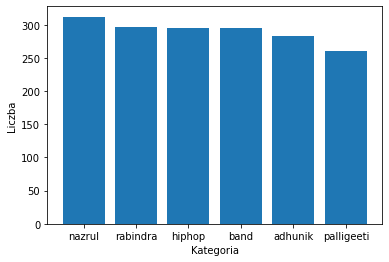

In [40]:
X = df['label'].value_counts()

classes = X.keys()

label = {}

for c in classes:
    label[c] = X[c]

plt.bar(label.keys(), label.values())
plt.xlabel('Kategoria')
plt.ylabel('Liczba')

print(X)

Stwórzmy osobne ramki dla poszczególnych kategorii

In [9]:
data_adhunik = df[df['label'] == 'adhunik']
data_band = df[df['label'] == 'band']
data_hiphop = df[df['label'] == 'hiphop']
data_nazrul = df[df['label'] == 'nazrul']
data_palligeeti = df[df['label'] == 'palligeeti']
data_rabindra = df[df['label'] == 'rabindra']

In [11]:
data_list = [data_adhunik, data_band, data_hiphop, data_nazrul, data_palligeeti, data_rabindra]
classes = np.array(['adhunik', 'band', 'hiphop', 'nazrul', 'palligeeti', 'rabindra'])

Zadanie 4: Co robi poniższy kod? Zmień kolory wykresu. Dodaj etykiety danych do słupków.

zero_crossing
179833.67137809188
275995.7152542373
225064.01016949152
184407.72435897434
261663.73846153845
169258.16498316498


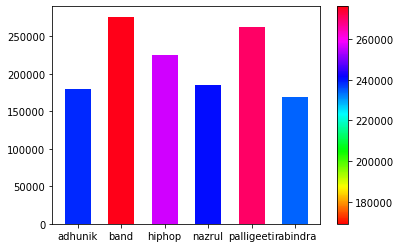

In [12]:
col_name = 'zero_crossing'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

spectral_centroid
2004.755221108732
2585.1004981981914
2436.973775151505
1363.5994732748848
2233.453301876838
1536.5376533372362


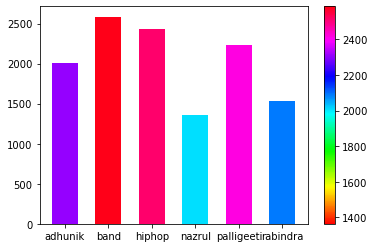

In [13]:
col_name = 'spectral_centroid'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

spectral_rolloff
4313.329030219406
5396.123389211625
5194.412510907178
2449.7371480025135
4414.39211426174
2983.1727724146535


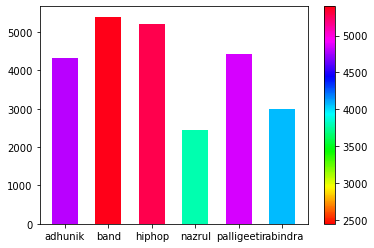

In [14]:
col_name = 'spectral_rolloff'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

spectral_bandwidth
2326.1618148804455
2513.215376382651
2512.7762357336333
1236.3016089670282
2111.88097648089
1629.9497009604122


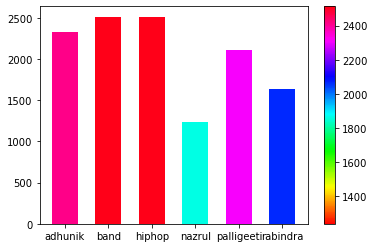

In [15]:
col_name = 'spectral_bandwidth'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

chroma_frequency
0.31287358583951597
0.35978639505996607
0.3888264347954499
0.2385208801594986
0.2837889299683471
0.25048065993487884


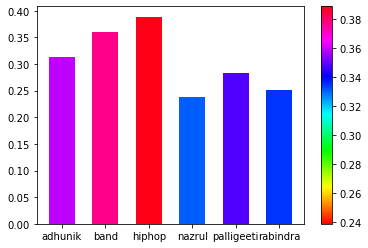

In [16]:
col_name = 'chroma_frequency'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

tempo
119.84027513127766
127.02895567930297
112.95735878442223
124.15518484953725
125.12835234826758
129.56600392149448


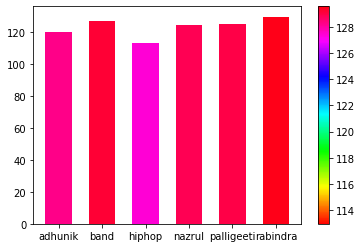

In [17]:
col_name = 'tempo'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

zero_crossing
179833.67137809188
275995.7152542373
225064.01016949152
184407.72435897434
261663.73846153845
169258.16498316498


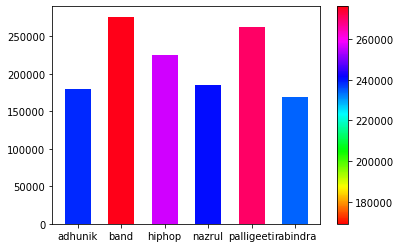

In [18]:
col_name = 'zero_crossing'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

rmse
0.1754621670010599
0.16074368868813577
0.20779618672881348
0.17412291010576922
0.169135676623077
0.14150188897643104


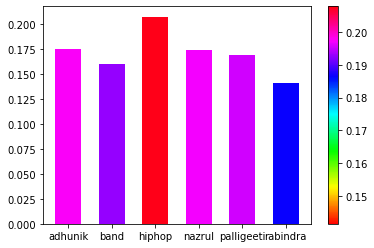

In [19]:
col_name = 'rmse'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

Zadanie 5: Przygotujmy teraz dane do modelowania. Przypomnij  sobie, jak działa standaryzacja zmiennych. Zmień podział zbioru na 70:30.

In [20]:
y = df['label']
X = df.drop(['file_name', 'label'], axis=1)

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) 
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [21]:
encoder.classes_

array(['adhunik', 'band', 'hiphop', 'nazrul', 'palligeeti', 'rabindra'],
      dtype=object)

In [22]:
encoder.inverse_transform([0, 1, 2, 3, 4, 5])

array(['adhunik', 'band', 'hiphop', 'nazrul', 'palligeeti', 'rabindra'],
      dtype=object)

In [23]:
print(X_train.shape, X_test.shape)

(1393, 29) (349, 29)


Zadanie 6: Zbudujmy sieć neuronową. Ile warstw ma sieć? Ile neuronów znajduje się w warstwie wejściowej? Dlaczego input_dim=29?Przeczytaj artykuł o funkcjach aktywacji https://ichi.pro/pl/funkcje-aktywacji-sigmoid-relu-leaky-relu-i-softmax-podstawy-dla-sieci-neuronowych-i-glebokiego-uczenia-155703049115934 Zastanów się, dlaczego używamy aktywacji relu i softmax? Ile wartości zwraca nasza sieć?

In [26]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=29, name="Warstwa 1", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.002)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', name="Warstwa 2", kernel_regularizer=l2(0.002), bias_regularizer=l2(0.0001)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', name="Warstwa 3", kernel_regularizer=l1(0.002), bias_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', name="Warstwa 4", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.0001)))
model.add(Dropout(0.4))
model.add(Dense(6, activation='softmax', name="Warstwa 5", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.002)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_Layer (Dense)          (None, 256)               7680      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Second_Layer (Dense)         (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
Third_Layer (Dense)          (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
Fourth_Layer (Dense)         (None, 64)               

Zadanie 6: Przeanlizuj kolejne epoki uczenia modelu. Jaką dokładność udało się osiągnąć na zbiorze testowym?

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=200, validation_data=(X_test, y_test), validation_split=0.2, epochs=100)

Epoch 1/100
6/6 [==============================] - 40s 486ms/step - loss: 3.7216 - accuracy: 0.2005 - val_loss: 3.5183 - val_accuracy: 0.3871
Epoch 2/100
6/6 [==============================] - 0s 30ms/step - loss: 3.5898 - accuracy: 0.2124 - val_loss: 3.4231 - val_accuracy: 0.4373
Epoch 3/100
6/6 [==============================] - 0s 28ms/step - loss: 3.4693 - accuracy: 0.2671 - val_loss: 3.3171 - val_accuracy: 0.4552
Epoch 4/100
6/6 [==============================] - 0s 20ms/step - loss: 3.3717 - accuracy: 0.2868 - val_loss: 3.2003 - val_accuracy: 0.4731
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 3.2295 - accuracy: 0.3123 - val_loss: 3.0736 - val_accuracy: 0.4659
Epoch 6/100
6/6 [==============================] - 0s 24ms/step - loss: 3.1708 - accuracy: 0.3362 - val_loss: 2.9642 - val_accuracy: 0.4803
Epoch 7/100
6/6 [==============================] - 0s 18ms/step - loss: 3.0505 - accuracy: 0.3405 - val_loss: 2.8716 - val_accuracy: 0.4910
Epoch 8/100
6/6 [=

6/6 [==============================] - 0s 12ms/step - loss: 1.1835 - accuracy: 0.7128 - val_loss: 1.3164 - val_accuracy: 0.6738
Epoch 60/100
6/6 [==============================] - 0s 11ms/step - loss: 1.1723 - accuracy: 0.7028 - val_loss: 1.3035 - val_accuracy: 0.6918
Epoch 61/100
6/6 [==============================] - 0s 11ms/step - loss: 1.1932 - accuracy: 0.6909 - val_loss: 1.2888 - val_accuracy: 0.6882
Epoch 62/100
6/6 [==============================] - 0s 12ms/step - loss: 1.1411 - accuracy: 0.7143 - val_loss: 1.3023 - val_accuracy: 0.6667
Epoch 63/100
6/6 [==============================] - 0s 15ms/step - loss: 1.1183 - accuracy: 0.7159 - val_loss: 1.2989 - val_accuracy: 0.6810
Epoch 64/100
6/6 [==============================] - 0s 15ms/step - loss: 1.1052 - accuracy: 0.7223 - val_loss: 1.2901 - val_accuracy: 0.6810
Epoch 65/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1177 - accuracy: 0.7087 - val_loss: 1.3051 - val_accuracy: 0.6774
Epoch 66/100
6/6 [========

A teraz zobaczmy, jak sprawuje się nasza sieć na zbiorze testowym.

In [28]:
y_predict = model.predict_classes(X_test)
y_predict

C:\Users\akotarba\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 2, 4, 2, 0, 0, 3, 5, 4, 0, 0, 4, 5, 5, 0, 2, 1, 0, 0, 1, 5,
       1, 0, 3, 0, 3, 3, 2, 0, 3, 3, 3, 4, 3, 4, 5, 4, 1, 4, 2, 2, 1, 5,
       5, 4, 1, 5, 3, 3, 0, 0, 3, 5, 1, 5, 5, 5, 3, 4, 4, 0, 1, 5, 5, 4,
       3, 4, 4, 5, 0, 1, 5, 1, 1, 1, 2, 1, 5, 5, 2, 0, 5, 1, 1, 5, 3, 5,
       2, 5, 0, 2, 5, 1, 2, 0, 1, 3, 4, 3, 0, 5, 1, 1, 5, 3, 5, 4, 5, 1,
       2, 0, 1, 5, 2, 5, 0, 2, 0, 5, 2, 2, 0, 5, 1, 4, 0, 0, 5, 1, 1, 3,
       2, 1, 2, 5, 2, 0, 4, 5, 3, 4, 3, 1, 5, 4, 1, 3, 0, 5, 0, 2, 5, 1,
       3, 5, 0, 5, 5, 0, 2, 1, 0, 1, 3, 0, 5, 2, 2, 0, 3, 1, 4, 3, 1, 0,
       0, 3, 1, 0, 2, 0, 3, 0, 1, 3, 5, 2, 5, 4, 1, 2, 5, 2, 2, 3, 5, 4,
       4, 5, 0, 3, 0, 5, 3, 0, 0, 3, 0, 2, 2, 5, 1, 4, 2, 5, 2, 5, 1, 3,
       1, 1, 5, 4, 3, 3, 5, 0, 2, 4, 5, 5, 1, 1, 1, 2, 5, 5, 4, 4, 3, 5,
       5, 2, 2, 2, 1, 0, 1, 4, 3, 1, 4, 2, 5, 1, 4, 4, 0, 3, 5, 4, 1, 4,
       0, 0, 4, 5, 5, 5, 2, 4, 4, 2, 5, 3, 2, 2, 3, 3, 0, 2, 4, 5, 0, 0,
       3, 2, 4, 0, 1, 5, 2, 4, 2, 0, 1, 2, 2, 4, 3,

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
score, acc = model.evaluate(X_test, y_test)
print(score, acc)

11/11 [==============================] - 0s 3ms/step - loss: 1.1290 - accuracy: 0.6734
1.12903892993927 0.6733524203300476


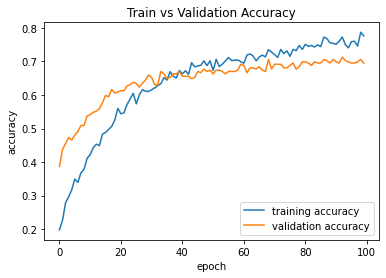

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

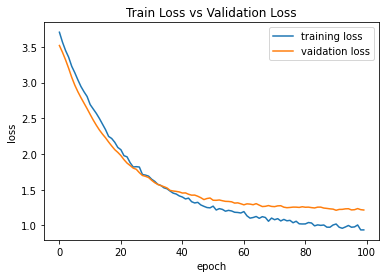

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'vaidation loss'], loc='upper right')
plt.show()

<AxesSubplot:>

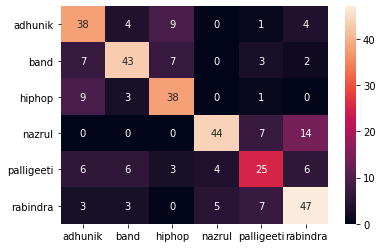

In [33]:
con_mat = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(con_mat, columns=encoder.classes_, index=encoder.classes_)
sn.heatmap(df_cm, annot=True)

Zadanie 7: Z powyższej macierzy wywnioskuj, z dopasowaniem której kategorii model radzi sobie najlepiej? A której najgorzej?

In [34]:
print(classification_report(y_test, y_predict, target_names=encoder.classes_))

              precision    recall  f1-score   support

     adhunik       0.60      0.68      0.64        56
        band       0.73      0.69      0.71        62
      hiphop       0.67      0.75      0.70        51
      nazrul       0.83      0.68      0.75        65
  palligeeti       0.57      0.50      0.53        50
    rabindra       0.64      0.72      0.68        65

    accuracy                           0.67       349
   macro avg       0.67      0.67      0.67       349
weighted avg       0.68      0.67      0.67       349



In [35]:
false = 0
true = 0
for i in range(len(y_predict)):
    if y_predict[i] == y_test[i]:
        true += 1
    else:
        false += 1
print('Total: ', false + true, 'True: ', true, 'False: ', false)

Total:  349 True:  235 False:  114


Zadanie*: Spróbuj zmodyfikować architekturę sieci, tak aby osiągała wyższą dokładność (więcej niż 67%). Możesz np. dodać warstwy lub zwiększyć liczby neuronów. Albo np. zrobić transformacje zmiennych.